In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.neighbors import KNeighborsClassifier


In [3]:
df =pd.read_csv('cancer.csv')


In [4]:
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,classes
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [5]:
df.shape

(699, 11)

In [9]:
df.describe()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bland_chrom,norm_nucleoli,mitoses,classes
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,0.344778
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.475636
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [10]:
df.dtypes

id                         int64
clump_thickness            int64
unif_cell_size             int64
unif_cell_shape            int64
marg_adhesion              int64
single_epith_cell_size     int64
bare_nuclei               object
bland_chrom                int64
norm_nucleoli              int64
mitoses                    int64
classes                    int64
dtype: object

In [16]:
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [17]:
#replace ? with 999
df['bare_nuclei'].replace('?',999,inplace=True)
df['bare_nuclei']= df['bare_nuclei'].astype('int64')

In [18]:
#checking for null values 
df.isnull().sum()

id                        0
clump_thickness           0
unif_cell_size            0
unif_cell_shape           0
marg_adhesion             0
single_epith_cell_size    0
bare_nuclei               0
bland_chrom               0
norm_nucleoli             0
mitoses                   0
classes                   0
dtype: int64

<Axes: >

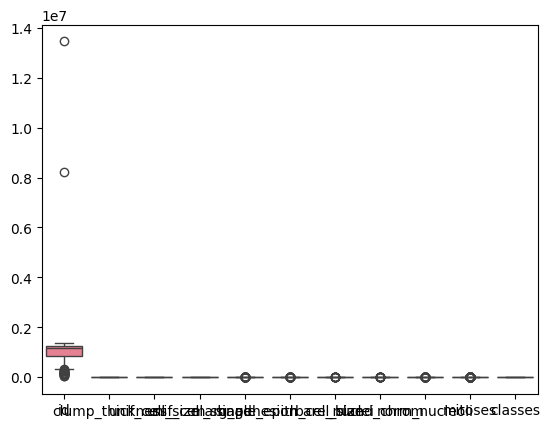

In [19]:
#checking for outliers in the entire dataset
sns.boxplot(data=df)

<Axes: >

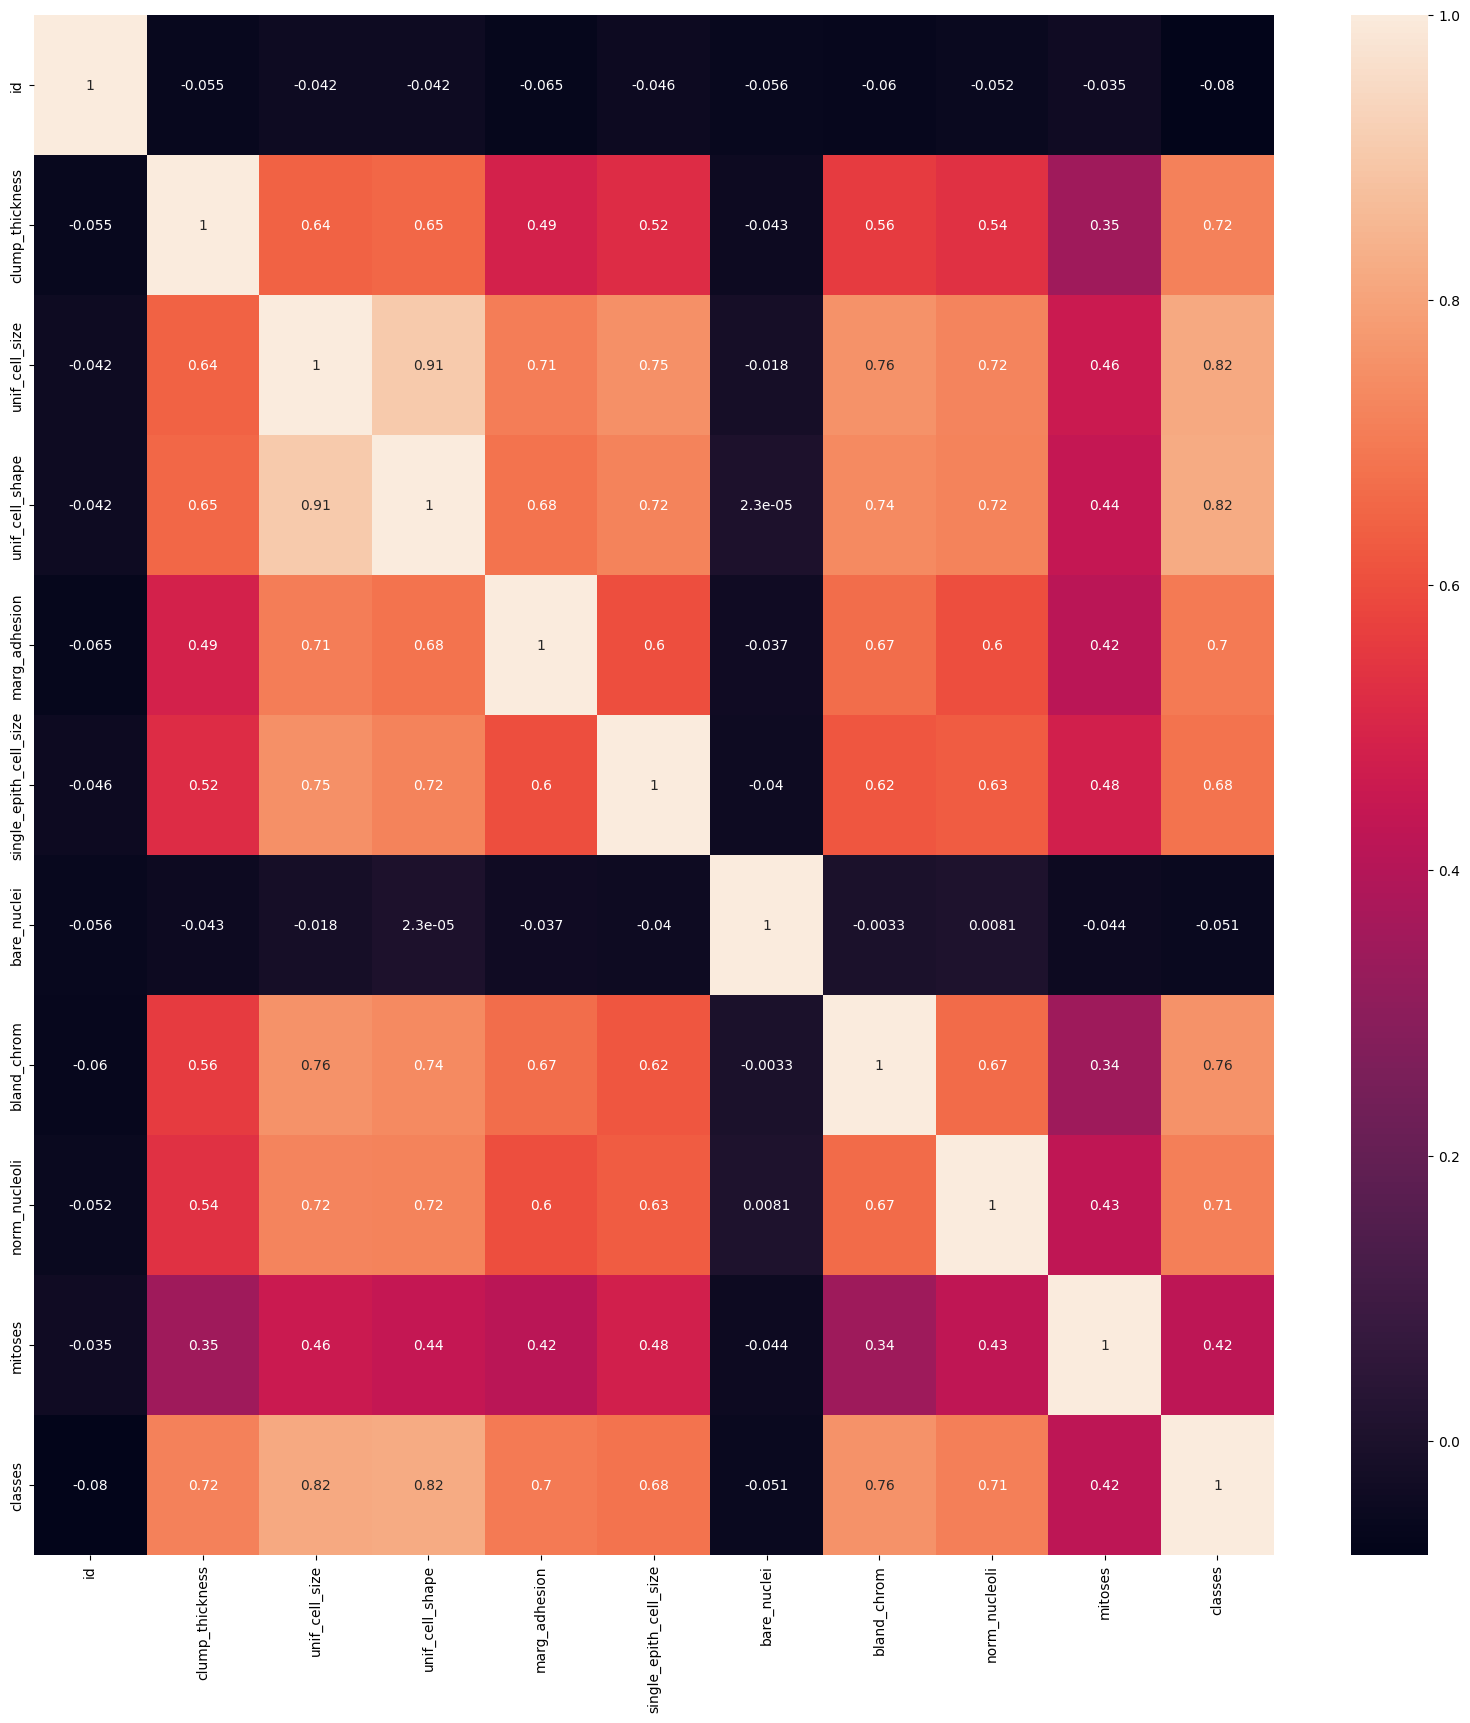

In [20]:
#checking for correlation
df.corr()

#plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [22]:
#splitting the data into train and test
X = df.drop(['id','classes'],axis=1)
y = df['classes']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#creating the model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

#predicting the model
y_pred = model.predict(X_test)

#checking the accuracy
print("accuracy score is",accuracy_score(y_test,y_pred))


#checking the r2 score
print("r2 score is",r2_score(y_test,y_pred))


accuracy score is 0.9809523809523809
r2 score is 0.9123264794906586


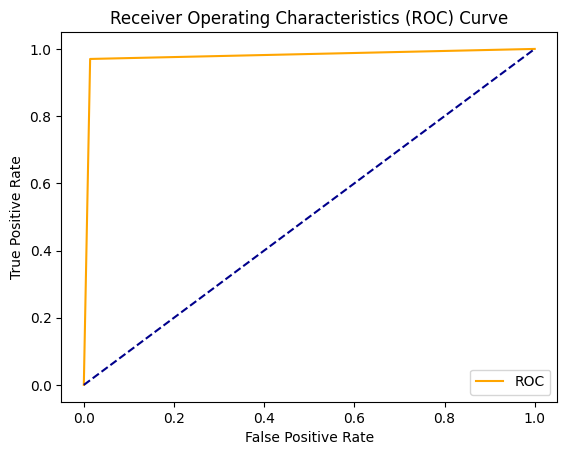

In [23]:
from sklearn.metrics import auc,roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.legend()
plt.show()


In [24]:
# f1-score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.9701492537313433